### **Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### **Load the Dataset**

In [ ]:
df = pd.read_csv('/content/Aggregation.txt', sep = '\t', skiprows=7, header = None, names=['X1','X2','y'] )

**Dataset** is taken from this website: https://www.kaggle.com/datasets/outsiders17711/2d-datasets

### **Fisrt Five Rows of Dataset**

In [ ]:
df.head()

,X1,X2,y
0,15.55,28.65,2
1,14.90,27.55,2
2,14.45,28.35,2
3,14.15,28.80,2
4,13.75,28.05,2


### **Information About Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      788 non-null    float64
 1   X2      788 non-null    float64
 2   y       788 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 18.6 KB


### **Missing Values in Dataset**

In [ ]:
df.isnull().sum()

,0
X1,0
X2,0
y,0


### **Statistical Analysis of the Dataset**

In [ ]:
df.describe()

,X1,X2,y
count,788.000000,788.000000,788.000000
mean,19.566815,14.171764,3.770305
std,9.922042,8.089683,1.596305
min,3.350000,1.950000,1.000000
25%,11.150000,7.037500,2.000000
50%,18.225000,11.725000,4.000000
75%,30.700000,21.962500,5.000000
max,36.550000,29.150000,7.000000


### **Visualize the Data**

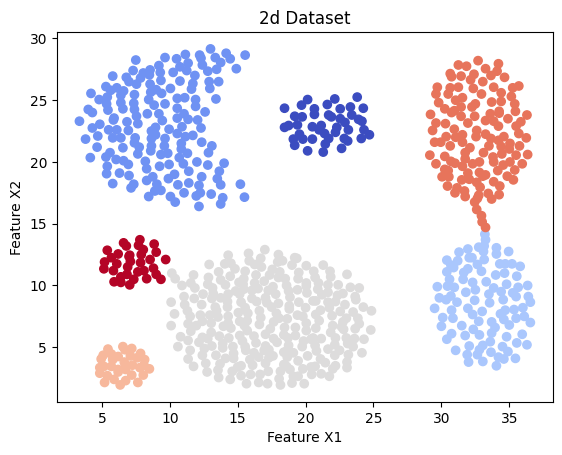

In [ ]:
plt.scatter(df['X1'], df['X2'], c=df['y'], cmap='coolwarm')
plt.title('2d Dataset')
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.show()

### **Class Distribution**

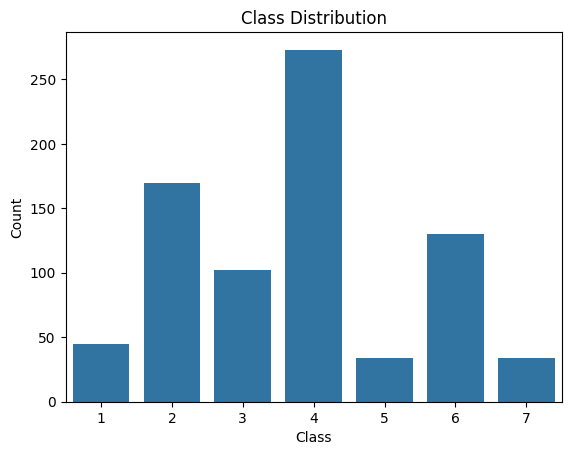

In [ ]:
sns.countplot(x='y', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### **Extract features from dataset**

In [ ]:
X = df.drop('y', axis=1)
X.shape

(788, 2)

### **Extracting target labels from dataset**

In [ ]:
Y = df['y']
Y.shape

(788,)

### **Split features and labels into training and test sets**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
print(f"X_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (551, 2)
x_test shape: (237, 2)
y_train shape: (551,)
y_test shape: (237,)


### **Train an SVM Model**

In [ ]:
model = SVC(kernel = 'linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

### **Evaluate the model**

In [ ]:
ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

#### **i) Confusion Matrix for training dataset and testing dataset**

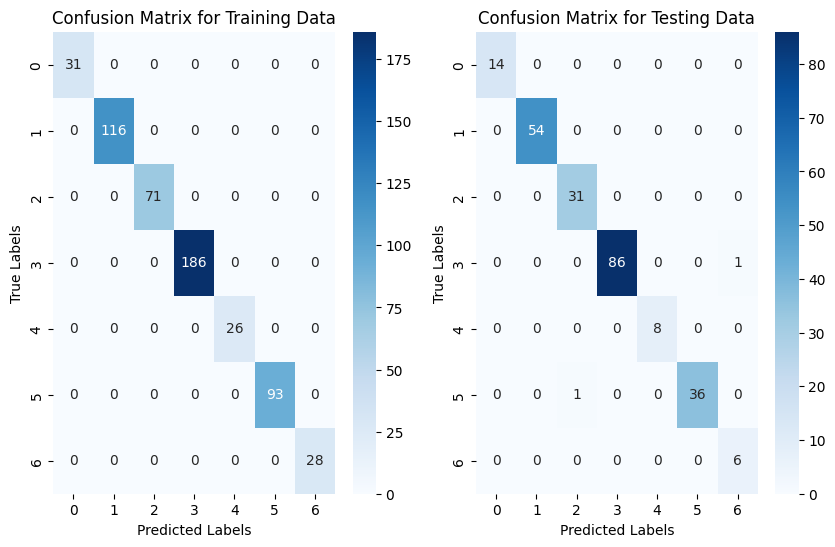

In [ ]:
confusino_matrix_train = confusion_matrix(y_train, ypred_train)
confusino_matrix_test = confusion_matrix(y_test, ypred_test)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.heatmap(confusino_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.subplot(1,2,2)
sns.heatmap(confusino_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Testing Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### **ii) Accuracy score for training dataset and test dataset**

In [ ]:
train_accuracy = accuracy_score(y_train, ypred_train)
test_accuracy = accuracy_score(y_test, ypred_test)
print(f"Train Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Train Accuracy: 100.00%
Test Accuracy: 99.16%


#### **iii) Classification Report for training dataset and test dataset**

In [ ]:
print("\nClassification Report for training dataset:\n", classification_report(y_train, ypred_train))
print("\nClassification Report for testing dataset:\n", classification_report(y_test, ypred_test))


Classification Report for training dataset:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00       116
           3       1.00      1.00      1.00        71
           4       1.00      1.00      1.00       186
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00        93
           7       1.00      1.00      1.00        28

    accuracy                           1.00       551
   macro avg       1.00      1.00      1.00       551
weighted avg       1.00      1.00      1.00       551


Classification Report for testing dataset:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        54
           3       0.97      1.00      0.98        31
           4       1.00      0.99      0.99        87
           5       1.00      1.00      1.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


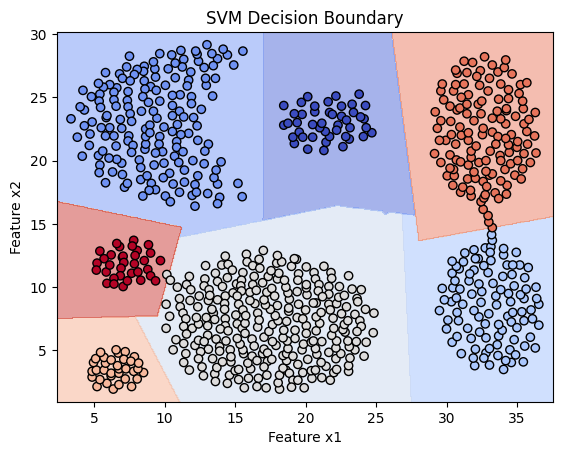

In [ ]:
# Create a mesh grid for visualization
# The mesh grid generates a grid of points covering the feature space.
# It helps in plotting decision boundaries across the entire input space.
X_np = X.to_numpy()
xx, yy = np.meshgrid(np.linspace(X_np[:, 0].min()-1, X_np[:, 0].max()+1, 500),  # X-axis grid points
                     np.linspace(X_np[:, 1].min()-1, X_np[:, 1].max()+1, 500))  # Y-axis grid points

# Predict on the grid points
# The model predicts class labels for each point in the grid, creating a decision map.
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # Flatten the grid points and predict classes
Z = Z.reshape(xx.shape)  # Reshape the predictions to match the grid shape

# Plot decision boundary and data points
# The decision boundary is visualized using a filled contour plot, showing class regions.
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')  # Plot decision regions with color
plt.scatter(X_np[:, 0], X_np[:, 1], c=Y, cmap='coolwarm', edgecolor='k')  # Plot original data points
plt.title('SVM Decision Boundary')  # Add plot title
plt.xlabel('Feature x1')  # Label for x-axis
plt.ylabel('Feature x2')  # Label for y-axis
plt.show()  # Display the plot

